# Загрузка данных

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('mydb.db') 

crm = pd.read_csv("crm_data.csv") 
visits = pd.read_csv("site_visits_data.csv") 

In [2]:
crm['application_ts'] = pd.to_datetime(crm['application_ts'].apply(lambda x: x.split(' UTC')[0]))
visits['visit_start_time'] = pd.to_datetime(visits['visit_start_time'].apply(lambda x: x.split(' UTC')[0]))

In [3]:
crm.to_sql('crm', conn, if_exists='replace', index=False)
visits.to_sql('visits', conn, if_exists='replace', index=False)

In [4]:
def fetch_query(query):
    try:
        conn = sqlite3.connect('mydb.db')
        return pd.read_sql_query(query, conn)
    except Exception as t:
        print(t)
    finally:
        conn.close()

In [5]:
query = """
SELECT * 
FROM crm
LIMIT 10
"""

# Передаем его на вход функции
fetch_query(query)

,user_id,id_contact,age,spoke_with_agent,application_ts,documents_send,documents_recieved,flag
0,0947abecd9b9ee653139dcafaf48e243,718951688,28,1,2019-07-19 16:07:25,0,0,0
1,baaa6faf65e6a37630e43520d061a0aa,721632137,29,1,2019-07-22 16:02:23,0,0,0
2,856d1cf0187a188a40f9749fdd28cc3d,718659195,20,0,2019-07-19 07:09:59,1,0,0
3,87f07128d407c5b0b4ce154d2202d4e9,719838762,41,1,2019-07-20 12:31:32,0,0,0
4,f822a4d35abadb48fb35d7829d8470b1,719324076,22,1,2019-07-20 06:55:21,0,0,0
5,2fce19bc21dfe3d89f149047b0ef8637,718957000,27,1,2019-07-19 16:38:02,0,0,0
6,eb106524e9a456e255041c69bb5778cc,719876679,35,1,2019-07-20 13:34:28,0,0,0
7,300651e9502dc76204377e9fce2734dc,721134206,29,1,2019-07-22 04:47:07,0,0,0
8,18e49cef40df0b2ae76a470fe13d5303,718880266,40,1,2019-07-19 12:54:33,0,0,0
9,5022c6ff49cbbc4e24d00d09be7a9291,722020100,46,0,2019-07-23 13:57:10,0,0,0


In [6]:
query = """
SELECT * 
FROM visits
LIMIT 10
"""

# Передаем его на вход функции
fetch_query(query)

,user_id,visit_start_time,session_duration,delivery_pickup,bounce_rate,total_sessions,user_type,visited_partners,step_1,step_2,step_3
0,1fb42a882f576c05f226ad3bf313caa1,2019-07-22 06:12:57,0,not_stated,1,1,new,0,0,0,0
1,7b2eb4009b25b2b02589b8b60fd8a3e3,2019-07-22 08:04:27,0,not_stated,1,1,old,0,0,0,0
2,39f4448e01e3126a9b35b32ae5b36bbe,2019-07-22 13:39:54,0,not_stated,1,1,old,0,0,0,0
3,12beb8d6d22fc4d1000b4cd0469f7dec,2019-07-22 14:54:17,0,not_stated,1,1,old,0,0,0,0
4,a2f10e983bdf1c5fbb04e3d89a4f5396,2019-07-22 18:21:49,0,not_stated,1,1,old,0,0,0,0
5,7893129d32e1f1c69ff63acae39a4d02,2019-07-22 04:45:48,0,not_stated,1,1,old,0,0,0,0
6,a8313f297969b9081f6a723573c0ab57,2019-07-22 05:50:16,0,not_stated,1,1,old,0,0,0,0
7,b6180913d315cfc3b7d13a77443ad567,2019-07-22 07:54:39,0,not_stated,1,1,new,0,0,0,0
8,ba8287463dcbbe4a1dd82ecbbc6519ed,2019-07-22 10:55:03,0,not_stated,1,1,old,0,0,0,0
9,cd17310175f2634e9fd9284493228ec1,2019-07-22 11:49:21,0,not_stated,1,1,new,0,0,0,0


# Задания по SQL

### 1)Написать запрос, который считает количество пользователей, разговаривавших с агентом 20-го и 21-го числа

In [7]:
query = """
SELECT count(id_contact) as Количество 
FROM crm
WHERE spoke_with_agent = 1 and (application_ts between '2019-07-20' and '2019-07-22')
"""

# Передаем его на вход функции
fetch_query(query)

,Количество
0,1953


### 2) Написать запрос, который отвечает на следующий вопрос: “Есть ли пользователи, которые перескакивали шаги в воронке (т.е. например они прошли шаг3, но  не проходили шаг 2). Если да, то сколько их?

In [8]:
query = """
SELECT 
CASE  
   WHEN step_1 = 1 AND step_2 = 1 AND step_3 = 1 THEN 'Type1'
   WHEN step_1 = 1 AND step_2 = 1 AND step_3 = 0 THEN 'Type2' 
   WHEN step_1 = 1 AND step_2 = 0 AND step_3 = 1 THEN 'Type3'
   WHEN step_1 = 0 AND step_2 = 1 AND step_3 = 1 THEN 'Type4'
   WHEN step_1 = 0 AND step_2 = 0 AND step_3 = 1 THEN 'Type5'
   ELSE 'Other' 
END AS funnelStep, COUNT (user_id) AS countUsers
FROM visits
GROUP BY funnelStep 
"""

# Передаем его на вход функции
fetch_query(query)

,funnelStep,countUsers
0,Other,40036
1,Type1,381
2,Type2,200
3,Type3,1669
4,Type4,3
5,Type5,1112


### 3)Может ли пользователь иметь 2 статуса, т.е. быть старым и новым? Напишите запрос, отвечающий на этот вопрос

In [9]:
query = """
SELECT count(total_sessions) as Количество 
FROM visits
"""

# Передаем его на вход функции
fetch_query(query)

,Количество
0,43401


In [10]:
query = """
SELECT distinct(user_id)
FROM visits
"""

# Передаем его на вход функции
fetch_query(query)

,user_id
0,1fb42a882f576c05f226ad3bf313caa1
1,7b2eb4009b25b2b02589b8b60fd8a3e3
2,39f4448e01e3126a9b35b32ae5b36bbe
3,12beb8d6d22fc4d1000b4cd0469f7dec
4,a2f10e983bdf1c5fbb04e3d89a4f5396
...,...
26055,aadf0420de20ddbc3bed80ded49ba9a5
26056,0d7af1cc3f7937be7917ba8227194553
26057,68499f0b94316bb10fa6f93ce78e95fe
26058,6b769bb9e3686d868133ee5851fad92a


Как мы можем видеть количество уникальных ID в половину меньше чем общее число ID пользователей, что говорит о том, что один пользователь мог взаимодествовать с сайтом по нескольку раз

In [11]:
query = """
SELECT user_id
FROM visits
WHERE user_type = 'new'
INTERSECT
SELECT user_id
FROM visits 
WHERE user_type ='old';
"""

# Передаем его на вход функции
fetch_query(query)

,user_id
0,000e29dd39c4030f4f69ca9b3497ac8c
1,0023d62e079ee14d5488c29db03ccb38
2,003673b3fda12cb05d2aa8467c12d6cc
3,0044fbae9b62c0c737e407bde4776e99
4,00548d83f78535d396a107951b6ebaf2
...,...
8516,ffc0456995a857931d9bd725a4062b8c
8517,ffd6d668ad8a3a83b36f0a59b346073e
8518,ffdb3f9f139395b52b7f180dd867cfac
8519,ffe0a99cb9c5d08c9e4b4df26270d8dc


Здесь мы можем увидеть, что 8521 пользователей имеют статус и старого и нового пользователя, это указывает, на то, что в течение отслеживаемого периода, пользователи пришедшие на сайт впервые и совершившие заказ, возвращались на него вновь

### 4) Посчитайте среднее время, которое проходит между визитом на сайт и подачей заявки (application_ts и visit_start_time соотв.)

In [12]:
query = """
select t1.user_id, (min(julianday(t2.application_ts)) - min(julianday(t1.visit_start_time))) as diff
From visits as t1
inner join crm as t2
on t1.user_id=t2.user_id
 group by t1.user_id
having min(julianday(t2.application_ts)) - min(julianday(t1.visit_start_time)) > 0
"""
fetch_query(query)

,user_id,diff
0,000a572cb1073e39b7673d10afb4bd62,0.003623
1,000e29dd39c4030f4f69ca9b3497ac8c,1.756192
2,0022d09fdf1958e151d4f53206d07e17,0.018333
3,0023d62e079ee14d5488c29db03ccb38,0.005567
4,002b30343595a2d0a234fa40ede9577e,0.008912
...,...,...
7324,ffb0596f19cbe607155064908db8e615,0.000532
7325,ffe0a99cb9c5d08c9e4b4df26270d8dc,1.816296
7326,ffe64124dddb1262a73d8b45e311216a,0.001065
7327,fff0a7eedadc0e3e3db572b809e4f6fd,0.002257


In [13]:
query = """
Select avg(diff) as avg_time
from (
select t1.user_id, (min(julianday(t2.application_ts)) - min(julianday(t1.visit_start_time))) as diff
From visits as t1
inner join crm as t2
on t1.user_id=t2.user_id
 group by t1.user_id
having min(julianday(t2.application_ts)) - min(julianday(t1.visit_start_time)) > 0) as tt1
"""
fetch_query(query)

,avg_time
0,0.036529


In [14]:
query = """
SELECT t1.user_id,
    strftime('%Y-%m-%d', t1.visit_start_time) AS Посещение
    ,strftime('%Y-%m-%d', t2.application_ts) AS Заказ
    ,min(JULIANDAY(t2.application_ts)) - min(JULIANDAY(t1.visit_start_time)) AS Период
FROM visits t1
JOIN crm t2
ON t1.user_id = t2.user_id
GROUP BY t1.user_id
HAVING min(JULIANDAY(t2.application_ts)) - min(JULIANDAY(t1.visit_start_time))> 0
"""
fetch_query(query)

,user_id,Посещение,Заказ,Период
0,000a572cb1073e39b7673d10afb4bd62,2019-07-19,2019-07-19,0.003623
1,000e29dd39c4030f4f69ca9b3497ac8c,2019-07-21,2019-07-23,1.756192
2,0022d09fdf1958e151d4f53206d07e17,2019-07-20,2019-07-20,0.018333
3,0023d62e079ee14d5488c29db03ccb38,2019-07-19,2019-07-19,0.005567
4,002b30343595a2d0a234fa40ede9577e,2019-07-22,2019-07-22,0.008912
...,...,...,...,...
7324,ffb0596f19cbe607155064908db8e615,2019-07-23,2019-07-23,0.000532
7325,ffe0a99cb9c5d08c9e4b4df26270d8dc,2019-07-19,2019-07-21,1.816296
7326,ffe64124dddb1262a73d8b45e311216a,2019-07-20,2019-07-20,0.001065
7327,fff0a7eedadc0e3e3db572b809e4f6fd,2019-07-23,2019-07-23,0.002257


In [15]:
query = """
SELECT Avg(Период) as Среднее_время 
FROM(SELECT t1.user_id,
    strftime('%Y-%m-%d', t1.visit_start_time) AS Посещение
    ,strftime('%Y-%m-%d', t2.application_ts) AS Заказ
    ,min(JULIANDAY(t2.application_ts)) - min(JULIANDAY(t1.visit_start_time)) AS Период
FROM visits t1
JOIN crm t2
ON t1.user_id = t2.user_id
GROUP BY t1.user_id
HAVING min(JULIANDAY(t2.application_ts)) - min(JULIANDAY(t1.visit_start_time))> 0) as Данные 
"""
fetch_query(query)

,Среднее_время
0,0.036529


### 5) Может ли пользователь иметь 2 или больше различных типа доставки? Напишите запрос, отвечающий на этот вопрос

In [16]:
query = """
SELECT user_id
FROM visits
WHERE delivery_pickup = 'delivery'
INTERSECT
SELECT user_id
FROM visits
WHERE delivery_pickup = 'not_stated'
INTERSECT
SELECT user_id
FROM visits
WHERE delivery_pickup = 'pickup'
"""

# Передаем его на вход функции
fetch_query(query)

,user_id
0,0b14227e1f9378580fe57842ae4dae16
1,0b3ac9a0512715a84286f03f33f25fad
2,0d09ab26ccef3489029a6c7b4d79e6a6
3,0f4f0e79fc734247c1dd73092a1e1f3a
4,223665c61bab3ca5ba42c9e2c1b6a118
5,226934f59785eb28d3270a7116850db4
6,261d6a9de7a27f22d3b16a7bb2e37c5d
7,27ee8a9fce328965f897da49cbd6151b
8,28e55fa9f486a8728a3d1a630f516792
9,290cc798a52d267d41fbfe4ebe97f7ae


У 59 пользователей было отмечено сразу 3 типа доставки

In [17]:
query = """
SELECT user_id
FROM visits
WHERE delivery_pickup = 'delivery'
INTERSECT
SELECT user_id
FROM visits
WHERE delivery_pickup = 'not_stated'
"""

# Передаем его на вход функции
fetch_query(query)

,user_id
0,0023d62e079ee14d5488c29db03ccb38
1,00675014637f17707f82f865c9660b0b
2,013904be556b714b6f8ac7104063523f
3,015c128686a3fc0e177908ef9f40f99b
4,01e6271472fc5d4eb1ef8cdd30598e99
...,...
926,fe4429bf9b016a8e2a1bab9554435503
927,fe7efcb3e9d241789043fe6cdfc0b023
928,fec129a516c3230fe1ef8019f8dcee0d
929,ff0c13b9f6b8642b1442ab7b6a173b71


In [18]:
query = """
SELECT user_id
FROM visits
WHERE delivery_pickup = 'delivery'
INTERSECT
SELECT user_id
FROM visits
WHERE delivery_pickup = 'pickup';
"""

# Передаем его на вход функции
fetch_query(query)

,user_id
0,00f231def94fbfecf7afad0da80f2476
1,0309f0c939a54a9203f1fa0a3aa6b94d
2,0532c5e273e163212415f5d30596c8d5
3,0b14227e1f9378580fe57842ae4dae16
4,0b3ac9a0512715a84286f03f33f25fad
...,...
135,f821a52a0c4414a12ff575b8ed8108a5
136,f822a4d35abadb48fb35d7829d8470b1
137,fa14e3b82fa958bfb085186010754b35
138,feb0358e2ff1fd72dff0687424a3980c


In [19]:
query = """
SELECT user_id
FROM visits
WHERE delivery_pickup = 'not_stated'
INTERSECT
SELECT user_id
FROM visits
WHERE delivery_pickup = 'pickup';
"""

# Передаем его на вход функции
fetch_query(query)

,user_id
0,000e29dd39c4030f4f69ca9b3497ac8c
1,0054a9477c1caa935b436b9572c28cbb
2,0058ffbb0a0af76d7f9910c698366ae6
3,0093d7eba24df4aa808482e40fff638c
4,016b3ab922c796b97c053991fe54e9f2
...,...
1691,feffe87a79e63594ec4c96b7d6a4b68f
1692,ff4140e398e5066854a7519fb82113d7
1693,ff70a3db3f2449cb783a54e64068e94c
1694,ff7f9558eb51ef16bd9b2b5f005c886a


Такое количество пользователей имеющими неколько статусов заказа связано с тем, что пользователи совершившие заказ, возвращаются обратно на сайт, что может говорить о лояльности клиентов к магазину

### 6*) Напишите запрос, который присваивает порядковый номер сессии для всех сессий конкретного пользователя (оконная функция)

In [20]:
query = """
SELECT user_id, visit_start_time, row_number() over (partition by user_id order by visit_start_time) as sessions_number
FROM visits
"""

fetch_query(query)

,user_id,visit_start_time,sessions_number
0,000a572cb1073e39b7673d10afb4bd62,2019-07-19 21:10:31,1
1,000e29dd39c4030f4f69ca9b3497ac8c,2019-07-21 15:54:47,1
2,000e29dd39c4030f4f69ca9b3497ac8c,2019-07-23 10:02:04,2
3,0010123f4379a11a2aa7ea0cedecbcda,2019-07-20 18:53:28,1
4,00132fb0c7096ec2636110ae8bb5b9a7,2019-07-21 15:18:27,1
...,...,...,...
43396,fff6e87042bf7e39632c256cede4f847,2019-07-22 10:10:44,1
43397,fff73d7e15c9929ef6cd82bd19f9ab1e,2019-07-22 06:51:54,1
43398,fff9a7934a7491903b326cc4d9b096cd,2019-07-19 16:21:14,1
43399,fffa2c81dbb6aed74420d737bb73c4b9,2019-07-21 12:34:33,1


# Задание Python+DS

## EDA

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv("total_data.csv") 

In [23]:
data.head()

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,not_stated,0.0,1.0,1,0,0,0,0,new
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,delivery,171.0,0.0,1,0,1,0,0,old
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,pickup,40.0,0.0,1,0,0,0,0,new
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,pickup,229.0,0.0,2,1,2,0,0,new
4,d9bf61f493e7e37df134a2e1284ccd00,29,1,0,0,0,pickup,152.0,0.0,1,1,0,0,0,old


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   request_id          8471 non-null   object 
 1   age                 8471 non-null   int64  
 2   spoke_with_agent    8471 non-null   int64  
 3   documents_send      8471 non-null   int64  
 4   documents_recieved  8471 non-null   int64  
 5   flag                8471 non-null   int64  
 6   delivery_pickup     8471 non-null   object 
 7   session_duration    8471 non-null   float64
 8   bounce_rate         8471 non-null   float64
 9   sessions            8471 non-null   int64  
 10  visited_partners    8471 non-null   int64  
 11  step_1              8471 non-null   int64  
 12  step_2              8471 non-null   int64  
 13  step_3              8471 non-null   int64  
 14  user_type           8471 non-null   object 
dtypes: float64(2), int64(10), object(3)
memory usage: 992.8

In [25]:
data.isnull().sum()

request_id            0
age                   0
spoke_with_agent      0
documents_send        0
documents_recieved    0
flag                  0
delivery_pickup       0
session_duration      0
bounce_rate           0
sessions              0
visited_partners      0
step_1                0
step_2                0
step_3                0
user_type             0
dtype: int64

In [26]:
data.describe()

,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3
count,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000
mean,32.738992,0.648566,0.212017,0.080274,0.080864,262.230814,0.085194,1.214615,0.028686,0.841341,0.065163,0.237162
std,9.429812,0.477446,0.408761,0.271733,0.272642,314.366181,0.265456,0.600259,0.166933,0.746718,0.247784,0.429511
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,78.166667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,158.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,0.000000,0.000000,323.200000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,83.000000,1.000000,1.000000,1.000000,1.000000,3364.000000,1.000000,14.000000,1.000000,6.000000,2.000000,3.000000


In [27]:
data.age.value_counts().head(10)

20    401
21    396
31    392
33    392
30    371
32    358
23    356
28    354
25    347
34    346
Name: age, dtype: int64

In [28]:
data.sessions.value_counts()

1     7141
2     1007
3      228
4       58
5       21
6       11
7        2
8        1
11       1
14       1
Name: sessions, dtype: int64

Мы можем видеть, что самыми частыми клиентами магазина являются потребители в возрасте от 20 до 30 лет.
И основное число пользователей завершает свои действия на сайте на протяжении 1 или 2 сессий, что может говорить нам о том, что пользователи приходят на сайт целенаправленно и не тратят большое количество времени на поиски необходимых вещей на сайте. Но также это может указывать на то, что большое число пользователей не находят интересных для себя товаров и покидают его вскоре после начала сессии.

In [29]:
data.step_1.value_counts()

1    4720
0    2706
2     814
3     171
4      39
5      16
6       5
Name: step_1, dtype: int64

In [30]:
data.step_2.value_counts()

0    7921
1     548
2       2
Name: step_2, dtype: int64

In [31]:
data.step_3.value_counts()

0    6475
1    1985
2       9
3       2
Name: step_3, dtype: int64

Если смотреть на количество попыток пользователей в заполнении анкеты, то можно определить, что:
- Основое число пользователей заполняющих первых этап анкеты заполняет ее с первого раза, но также имеются пользователи, которые пытаются заполнить этот этап в течение нескольких попыток. Это может быть связано с не понимаем в заполнении анкеты.
- Второй шаг анкеты заполняется достаточно редко
- Третий шаг заполняет большая часть пользователей
- Учитывая большую разницу между количеством пользователй заполнивших анкету на каждом из этапов, можно сказать, что большое количество пользователей пропускают второй этап анкеты, а также, что существует часть пользователей пропустивших и первый этап анкеты.

In [32]:
data.delivery_pickup.value_counts()

pickup        4738
delivery      2605
not_stated    1128
Name: delivery_pickup, dtype: int64

In [33]:
data.user_type.value_counts()

new    6809
old    1662
Name: user_type, dtype: int64

In [34]:
data.visited_partners.value_counts()

0    8228
1     243
Name: visited_partners, dtype: int64

In [35]:
data.flag.value_counts()

0    7786
1     685
Name: flag, dtype: int64

- Наибольшее число покупателей приобретали продукцию с самовывозом
- Основное число пользователей являются новыми и в основном пользователи приходят на сайт без сайтов партнеров
- Количество пользователей совершивших покупку крайне мало

In [36]:
df=data[['age', 'spoke_with_agent', 'flag', 'bounce_rate', 'sessions', 'visited_partners', 'step_1', 'step_2', 'step_3', 'user_type']]

In [37]:
df.loc[(df['flag'] == 1)].sort_values(by='age', ascending = True)

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
8002,20,0,1,0.333333,3,0,3,0,0,old
7930,20,0,1,1.000000,1,0,0,0,0,new
7931,20,0,1,0.000000,1,0,1,1,1,old
6983,20,1,1,0.000000,2,0,2,1,0,old
7906,20,0,1,0.000000,1,0,1,1,1,new
...,...,...,...,...,...,...,...,...,...,...
7857,65,1,1,0.000000,1,0,0,0,0,old
7858,65,1,1,0.000000,1,0,1,0,0,old
8213,65,1,1,0.500000,2,0,2,0,0,new
6445,65,1,1,0.000000,1,0,1,0,0,new


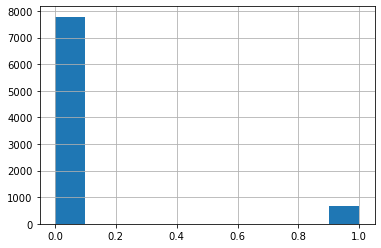

In [38]:
df.flag.hist()
plt.show()

In [39]:
df.loc[(df['spoke_with_agent'] == 1)]

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
2,31,1,0,0.0,1,0,0,0,0,new
3,23,1,0,0.0,2,1,2,0,0,new
4,29,1,0,0.0,1,1,0,0,0,old
5,29,1,0,1.0,1,0,0,0,0,new
7,33,1,0,0.0,1,0,1,0,0,new
...,...,...,...,...,...,...,...,...,...,...
8465,42,1,1,0.0,1,0,0,0,0,new
8467,35,1,1,0.0,1,0,1,0,0,new
8468,66,1,1,0.0,1,0,1,0,1,new
8469,41,1,1,0.0,1,0,0,0,0,new


In [40]:
df.loc[(df['flag'] == 1)&(df['spoke_with_agent'] == 1)]

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
4084,41,1,1,0.0,1,0,1,0,0,new
4164,33,1,1,0.0,1,0,1,0,0,new
4177,42,1,1,0.0,2,1,2,0,0,new
4595,34,1,1,0.0,1,0,1,1,0,old
4817,48,1,1,0.0,1,0,0,0,0,new
...,...,...,...,...,...,...,...,...,...,...
8465,42,1,1,0.0,1,0,0,0,0,new
8467,35,1,1,0.0,1,0,1,0,0,new
8468,66,1,1,0.0,1,0,1,0,1,new
8469,41,1,1,0.0,1,0,0,0,0,new


Здесь мы выявили, что 567 из 685 пользователей совершивших покупку, обращались за консультацией к агенту.

In [41]:
df.loc[(df['user_type'] == 'new')&(df['spoke_with_agent'] == 1)].sort_values(by='flag', ascending = False)

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
8469,41,1,1,0.0,1,0,0,0,0,new
8005,39,1,1,0.0,3,0,3,0,0,new
7987,22,1,1,0.0,1,0,1,0,0,new
7988,25,1,1,1.0,2,0,0,0,0,new
7990,59,1,1,1.0,2,0,0,0,0,new
...,...,...,...,...,...,...,...,...,...,...
2412,41,1,0,0.0,1,0,1,0,0,new
2414,41,1,0,0.0,1,0,1,0,1,new
2415,30,1,0,0.0,1,0,1,0,0,new
2417,37,1,0,0.0,1,0,0,0,0,new


In [42]:
df.loc[(df['user_type'] == 'old')&(df['spoke_with_agent'] == 1)].sort_values(by='flag', ascending = False)

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
8470,37,1,1,0.0,1,0,1,0,0,old
7980,61,1,1,0.0,1,0,1,0,1,old
8042,41,1,1,0.0,1,0,1,1,0,old
8036,44,1,1,0.0,1,0,1,0,0,old
8027,41,1,1,0.0,1,0,1,0,0,old
...,...,...,...,...,...,...,...,...,...,...
2726,47,1,0,0.0,1,0,1,0,0,old
2728,24,1,0,0.0,1,0,1,0,1,old
2740,35,1,0,0.0,1,0,1,0,0,old
2744,20,1,0,1.0,1,0,0,0,0,old


Среди пользователей обращавшихся к консультанту, новых пользователей на 3260 человек больше чем старых

In [43]:
df.loc[(df['user_type'] == 'old')&(df['flag'] == 1)] 

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
4542,41,0,1,0.0,1,0,1,0,0,old
4595,34,1,1,0.0,1,0,1,1,0,old
4963,28,0,1,0.0,1,0,1,1,1,old
5088,29,0,1,1.0,2,0,0,0,0,old
5089,29,0,1,0.0,1,0,1,0,0,old
...,...,...,...,...,...,...,...,...,...,...
8451,35,1,1,0.0,2,0,2,0,0,old
8455,34,1,1,0.0,1,0,1,0,1,old
8463,32,1,1,0.5,2,0,0,0,0,old
8464,42,1,1,0.0,1,0,0,0,0,old


In [44]:
df.loc[(df['user_type'] == 'new')&(df['flag'] == 1)] 

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
4084,41,1,1,0.000000,1,0,1,0,0,new
4164,33,1,1,0.000000,1,0,1,0,0,new
4177,42,1,1,0.000000,2,1,2,0,0,new
4291,22,0,1,0.000000,1,0,1,0,0,new
4541,41,0,1,0.666667,3,0,0,0,0,new
...,...,...,...,...,...,...,...,...,...,...
8465,42,1,1,0.000000,1,0,0,0,0,new
8466,51,0,1,0.000000,2,0,2,0,0,new
8467,35,1,1,0.000000,1,0,1,0,0,new
8468,66,1,1,0.000000,1,0,1,0,1,new


Новых пользователей совершивших покупку в 2 раза больше, чем среди старых пользователей, это может указывать, но то, что пользователя не устраивает приобретенный товар и пользователь не желает совершать повторную покупку.

In [45]:
df.loc[(df['visited_partners'] == 1)&(df['flag'] == 1)]

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
4177,42,1,1,0.000000,2,1,2,0,0,new
7295,37,1,1,0.000000,1,1,0,0,0,old
7846,34,0,1,0.400000,5,1,0,0,0,old
7859,35,1,1,0.000000,2,1,2,0,0,old
7868,30,1,1,0.333333,3,1,0,0,0,new
7908,20,1,1,0.000000,3,1,0,0,3,old
7915,58,0,1,0.000000,3,1,3,0,0,new
7921,50,0,1,0.000000,2,1,0,0,0,old
8007,30,1,1,0.000000,2,1,2,0,1,old
8011,32,1,1,0.000000,2,1,2,0,0,old


Среди пользователей перешедших от парнеров, всего 30 совершили покупку

In [46]:
df.loc[(df['visited_partners'] == 1)&(df['user_type'] == 'new')]

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
3,23,1,0,0.0,2,1,2,0,0,new
140,33,0,0,0.0,1,1,0,0,0,new
165,28,1,0,0.0,3,1,3,0,0,new
288,22,1,0,0.0,3,1,3,0,0,new
290,21,1,0,0.2,5,1,5,0,1,new
...,...,...,...,...,...,...,...,...,...,...
8285,35,1,1,0.5,2,1,0,0,0,new
8303,30,1,1,0.0,1,1,0,0,0,new
8312,25,0,1,0.0,1,1,0,0,0,new
8413,36,1,1,0.0,1,1,0,0,0,new


In [47]:
df.loc[(df['visited_partners'] == 1)&(df['user_type'] == 'old')]

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
4,29,1,0,0.0,1,1,0,0,0,old
35,40,1,0,0.0,1,1,1,0,0,old
186,39,0,0,0.0,1,1,1,0,0,old
375,30,1,0,0.0,2,1,2,0,0,old
392,44,1,0,0.5,2,1,0,0,0,old
...,...,...,...,...,...,...,...,...,...,...
8054,35,1,1,0.0,1,1,1,0,0,old
8118,38,1,1,0.0,1,1,1,0,0,old
8229,38,1,1,0.0,1,1,1,0,1,old
8362,40,1,1,0.0,1,1,0,0,0,old


Новых пользователей посетивших сайт через партнеров всего на 33 человека больше, чем среди старых пользователей, а это говорит о том, что реклама у партнеров не является эффективной.

# Визуализация

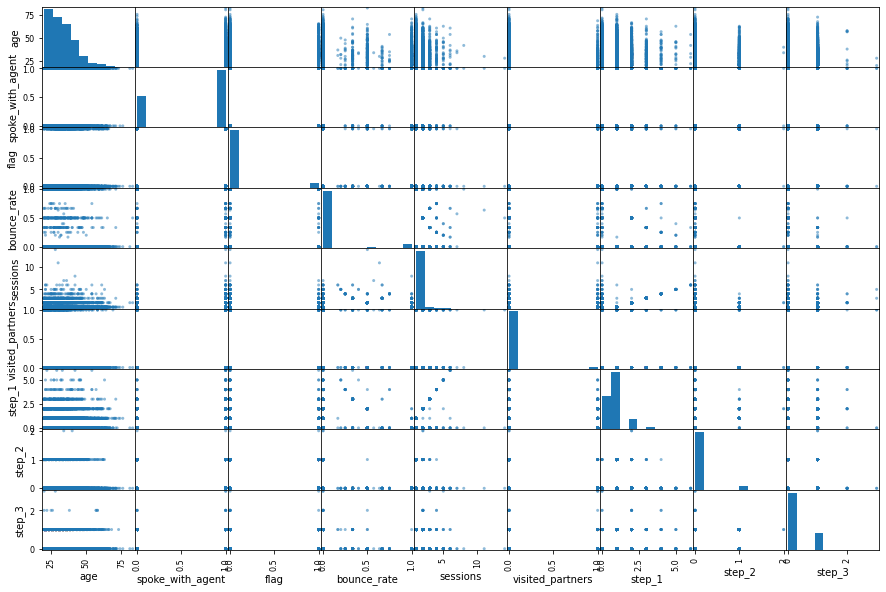

In [48]:
pd.plotting.scatter_matrix(df, figsize=(15,10));

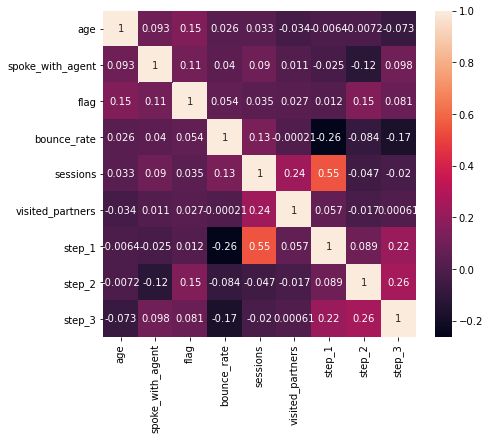

In [49]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [50]:
import warnings

warnings.filterwarnings('ignore')

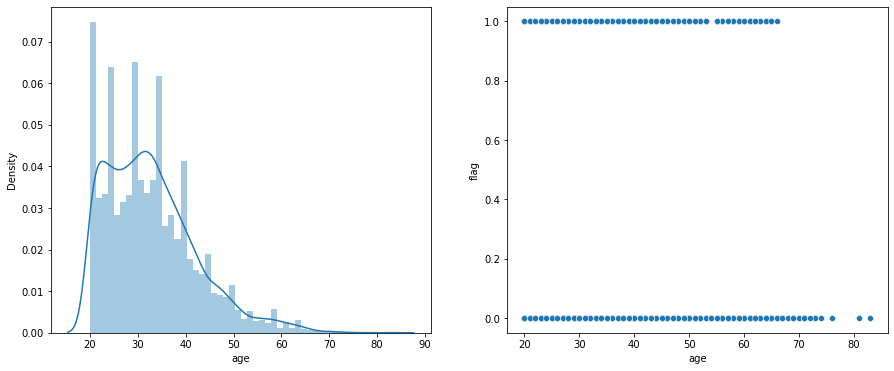

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['age']) # Распределение по  Возрасту

plt.subplot(1, 2, 2)
sns.scatterplot(df['age'], df['flag']) #Связь между Возрастом потребителей и Совершивших покупку
plt.show()

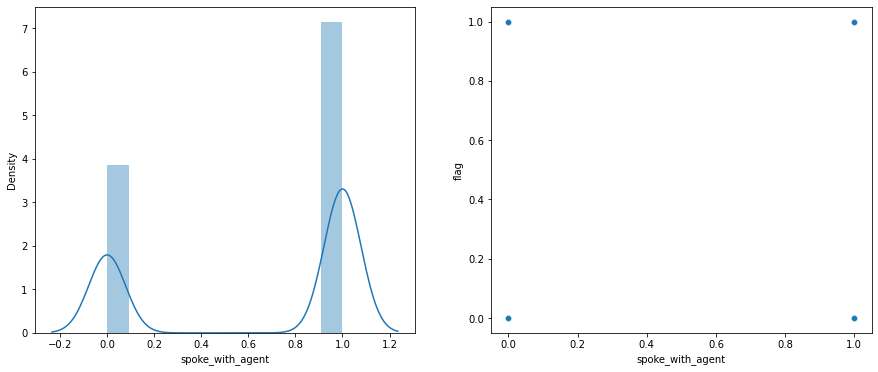

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['spoke_with_agent']) # Распределение по Количеству обратившихся к агенту

plt.subplot(1, 2, 2)
sns.scatterplot(df['spoke_with_agent'], df['flag']) #Связь между Обратившимся к агенту и Совершивших покупку
plt.show()

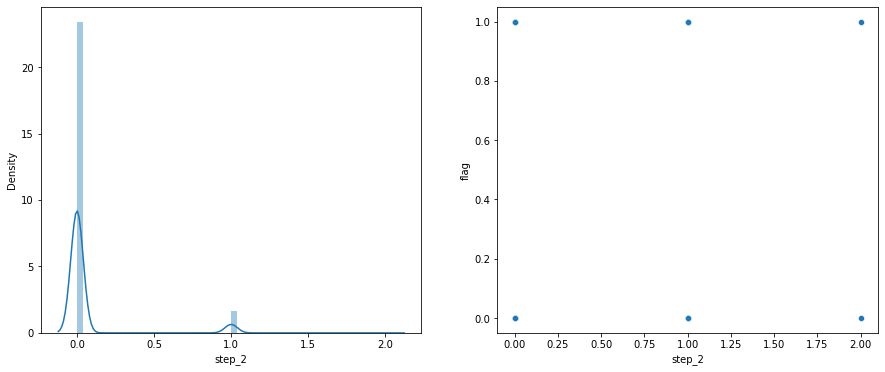

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['step_2']) # Распределение по Заполнившим второй шаг анкеты

plt.subplot(1, 2, 2)
sns.scatterplot(df['step_2'], df['flag']) #Связь между Заполнившим второй шаг анкеты и Совершивших покупку
plt.show()

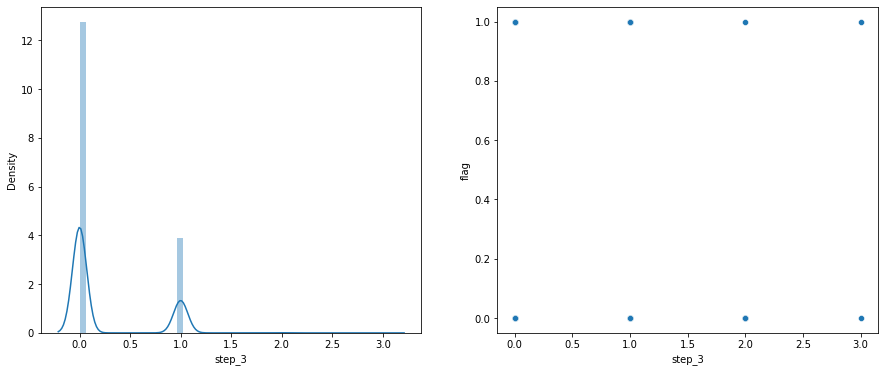

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['step_3']) # Распределение по Заполнившим третий шаг анкеты

plt.subplot(1, 2, 2)
sns.scatterplot(df['step_3'], df['flag']) #Связь между Заполнившим третий шаг анкеты и Совершивших покупку
plt.show()

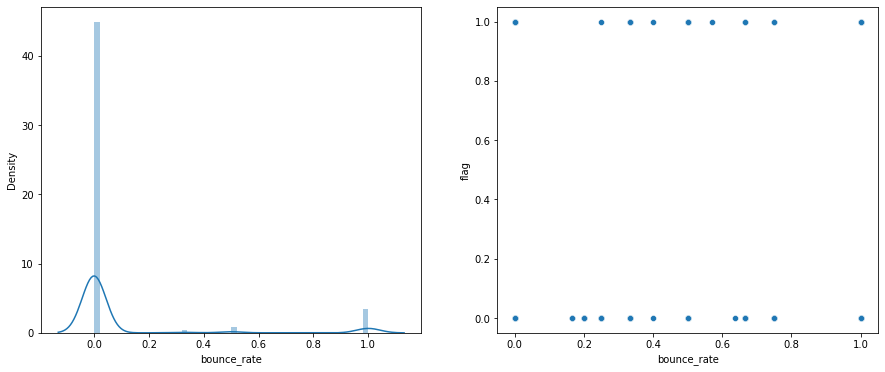

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(df['bounce_rate']) # Распределение по Доле неудавшихся сессий

plt.subplot(1, 2, 2)
sns.scatterplot(df['bounce_rate'], df['flag']) #Связь между Долей неудавшихся сессий и Совершивших покупку
plt.show()

In [56]:
df.sessions.unique()

array([ 1,  2,  5,  3,  4,  6, 11,  8, 14,  7], dtype=int64)

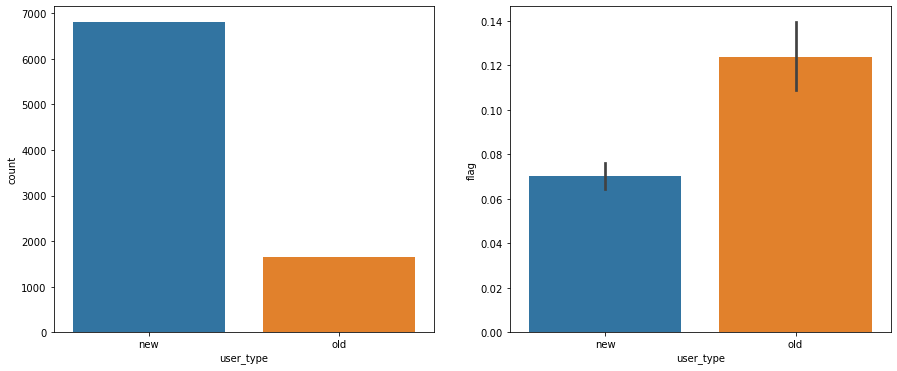

In [57]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(df['user_type'])

plt.subplot(1, 2, 2)
sns.barplot(x='user_type', y='flag', data=df)
plt.show()

- Как мы можем видеть из анализа, число клиентов совершивших покупку, составляет лишь 8% от всего количества посетителей сайта. При этом мы видим, что большое число пользователей обращалось за помощью к агентам. И таким образом мы можем предположить, что на шаге общения клиента с агентом, клиент теряет интерес к приобретению товара. Также мы можем заметить, что многие клиенты пропускают второй этап заполнения анкеты и преходят натследующий этап. Стоит пересмотреть необходимость наличия информации из второго сектора анкеты, для того, чтобы лишний раз не нагружать потребителя заполнением анкеты и не вынуждать его обращаться за помощью к агентам, так как больше всего клиентов уходит после общения с агентом. Дополнительно можно рассмотреть необходимость рекламы на сайтах партнеров, так как приход клиентов с их сайтов крайне мал, при этом часть клиентов являются уже старымы клиентами и знают о магазине и сайте.
- По итогу можно заключить, что для клучшения работы магазина необходимо:
1) Доработать анкету и исключить не нужные вопросы.
2) Пересмотреть работу агентов с клиентами
3) Запустить рекламу на других сайтах и при необходимости убрать ее с сайтов парнеров.

# Предобработка и обучение модели

In [58]:
class_to_index = {"new":0, "old":1}
names_to_ids = lambda n: np.array([class_to_index.get(x) for x in n])

In [59]:
df["user_type"] = names_to_ids(df["user_type"])

In [60]:
df

,age,spoke_with_agent,flag,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,45,0,0,1.0,1,0,0,0,0,0
1,45,0,0,0.0,1,0,1,0,0,1
2,31,1,0,0.0,1,0,0,0,0,0
3,23,1,0,0.0,2,1,2,0,0,0
4,29,1,0,0.0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8466,51,0,1,0.0,2,0,2,0,0,0
8467,35,1,1,0.0,1,0,1,0,0,0
8468,66,1,1,0.0,1,0,1,0,1,0
8469,41,1,1,0.0,1,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [62]:
data.drop(['age','spoke_with_agent','flag','bounce_rate','visited_partners'], axis = 1, inplace = True)

In [63]:
# Целевая переменная
y = df['flag']
# Признаки
X = df.drop('flag', axis = 1)

In [64]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('flag',axis=1), df['flag'], 
                                                   test_size=.2, random_state=12345)

In [65]:
scorer = make_scorer(roc_auc_score, needs_proba=True)

In [66]:
model_log_reg = LogisticRegression()

In [67]:
model_log_reg.fit(X_train, y_train)

LogisticRegression()

In [68]:
roc_auc_score(y_test, model_log_reg.predict_log_proba(X_test)[:,1])

0.7637919154800183

In [69]:
model = DecisionTreeClassifier()

In [70]:
params = {
    'max_depth': range(1,50)
}

In [71]:
rscv = RandomizedSearchCV(model, param_distributions=params, cv=5, n_iter=50, n_jobs=-1, verbose=2, 
                          scoring=scorer)

In [72]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1, param_distributions={'max_depth': range(1, 50)},
                   scoring=make_scorer(roc_auc_score, needs_proba=True),
                   verbose=2)

In [73]:
rscv.best_score_

0.7309985374473597

In [74]:
model_log_reg.coef_

array([[ 0.0507996 ,  1.14473612,  0.86346866,  0.04050951,  0.48014421,
        -0.02971668,  1.70425631,  0.58422212,  0.56827179]])

In [75]:
res1 = pd.DataFrame(list(X_train))

In [76]:
model_log_reg.coef_[0]

array([ 0.0507996 ,  1.14473612,  0.86346866,  0.04050951,  0.48014421,
       -0.02971668,  1.70425631,  0.58422212,  0.56827179])

In [77]:
res1['coeff'] = model_log_reg.coef_[0]

In [78]:
res1.sort_values('coeff')

,0,coeff
5,step_1,-0.029717
3,sessions,0.040510
0,age,0.050800
4,visited_partners,0.480144
8,user_type,0.568272
7,step_3,0.584222
2,bounce_rate,0.863469
1,spoke_with_agent,1.144736
6,step_2,1.704256
